In [123]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

In [124]:
np.random.seed(42)

Part (a)
--

First let's compute the distribution of $\hat\theta$ analytically. Consider the random variable $Z=X_{(n)}=\max\{X_1,\ldots,X_n\}=\hat\theta$. We will compute its distribution by considering it as a transformation of $(X_1,\ldots,X_n)$.

When $0\leq z\leq \theta$, the CDF $F_Z(z)$ is equal to
$$F_Z(z) = \mathbb P(X_1\leq z,\ldots,X_n \leq z) = \mathbb P(X_1\leq z) \cdots \mathbb P(X_n\leq z) = \left(\frac{z}{\theta}\right)^n.$$
Of course $F_Z(z)=0$ for $z<0$ and $F_Z(z)=1$ for $z>\theta$.

Thus the PDF $f_Z(z)= \frac{n}{\theta^n} z^{n-1}$ for $0\leq z\leq 1$ and $f_Z(z)=0$ otherwise.

Now let's plot a histogram of bootstrapped values of $\hat \theta$ versus the actual distribution $f_Z(z)$ using both the nonparametric and parametric bootstrap.

In [125]:
f = lambda z: n/theta**n * z**(n-1) if 0<=z and z<=1 else 0

In [126]:
n = 50

In [127]:
theta = 1

In [128]:
x = np.linspace(-0.01,1.01,100)

In [129]:
y = np.array(list(map(f,x)))

In [130]:
X = uniform.rvs(loc=0, scale=theta, size=n)

In [131]:
theta_hat = np.max(X)

In [132]:
B = int(1e5)

In [133]:
T_boot_unparam = np.empty(B)

In [134]:
for i in range(B):
    X_star_boot = np.random.choice(X, size=n, replace=True)
    theta_boot = np.max(X_star_boot)
    T_boot_unparam[i] = theta_boot

In [135]:
T_boot_param = np.empty(B)

In [136]:
for i in range(B):
    X_star_boot = uniform.rvs(loc=0, scale=theta_hat, size=n)
    theta_boot = np.max(X_star_boot)
    T_boot_param[i] = theta_boot

Text(0.5, 1.0, 'Histogram for the nonparamteric bootstrap')

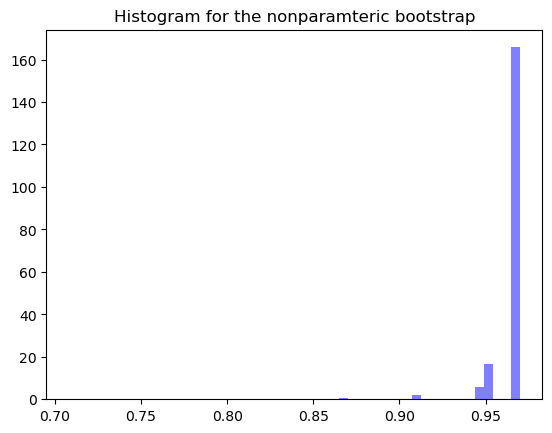

In [137]:
plt.hist(T_boot_unparam, density=True, color='blue', alpha=0.5, bins=50)
plt.title('Histogram for the nonparamteric bootstrap')

Text(0.5, 1.0, 'Histogram for the parametric bootstrap')

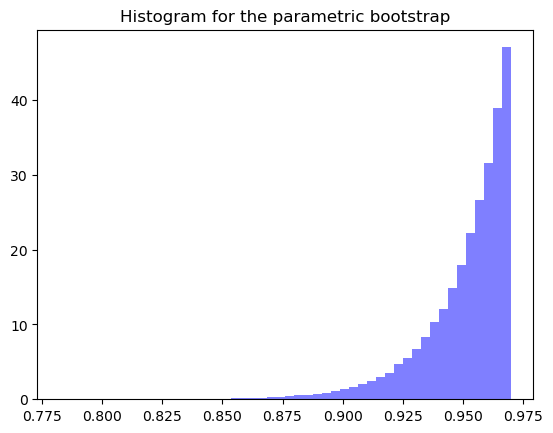

In [138]:
plt.hist(T_boot_param, density=True, color='blue', alpha=0.5, bins=50)
plt.title('Histogram for the parametric bootstrap')

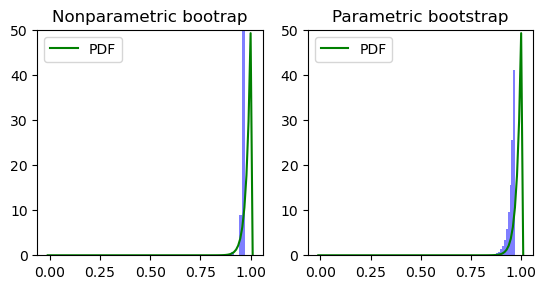

In [139]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

plt.subplots_adjust(wspace=0.2)

ax1.hist(T_boot_unparam, density=True, color='blue', alpha=0.5, bins=20)
ax1.plot(x, y, color='green', label='PDF')
ax1.set_ylim([0,50])
ax1.set_title('Nonparametric bootrap')
ax1.set_aspect(1.0/ax1.get_data_ratio(), adjustable='box')
ax1.legend()

ax2.hist(T_boot_param, density=True, color='blue', alpha=0.5, bins=20)
ax2.plot(x, y, color='green', label='PDF')
ax2.set_ylim([0,50])
ax2.set_title('Parametric bootstrap')
ax2.set_aspect(1.0/ax2.get_data_ratio(), adjustable='box')
ax2.legend()

We can see that the histogram for the parametric bootstrap matches the actual PDF a little bit better.

Part (b)
--

For the parametric bootstrap we have
$$\hat \theta^* = \frac{1}{B} \sum_{i=1}^B \max_{1\leq j\leq n} X_j^i$$
where for each fixed $i$, $X^i_1,\ldots,X^i_n$ are sampled from $\text{Uniform}(0,\hat\theta)$. In particular, $\hat \theta^*$ is a continuous random variable (its PDF can be obtained from the convolution of the PDFs of the random variables $\max_{1\leq j\leq n} X_j^i$) so that $\mathbb P(\hat\theta^*=\hat\theta)=0$.

For the parametric bootstrap, assume the $X_i$ are distinct. Let $X_1^*,\ldots,X_n^*$ be a bootstrap sample. Suppose without loss of generality that $X_n=\hat\theta=\max X_i$. Then $\hat \theta^*\neq \hat\theta$ exactly when $X_n\neq X_i^*$ for all $i$. This leaves $(n-1)^n$ options for $X_1^*,\ldots,X_n^*$. On the other hand, there are $n^n$ options for $X_1^*,\ldots,X_n^*$ total.

So
$$\mathbb P(\hat \theta^*=\hat\theta) = 1 - \frac{(n-1)^n}{n^n} = 1 - (1-1/n)^n.$$
For large $n$ this is approximately equal to $1-e^{-1}=0.632\ldots$.